# DIAMANTES

## Enlace de datos
https://www.kaggle.com/datasets/shivam2503/diamonds

## TEXTO DEL PROBLEMA
Los diamantes se dividen en cinco tipos de impurezas según la estructura de sus átomos de carbono. El conjunto de datos de Diamantes de Kaggle te ofrece aún más información: talla, claridad, color y precio. Desarrolla en él tus habilidades de visualización de datos con algún análisis exploratorio de datos.

## PREGUNTAS PROPUESTAS
1. MIRADA AL SET DE DATOS
2. DATOS FALTANTES
3. COLUMNAS IRRELEVANTES
4. REGISTROS REPETIDOS
5. OUTLIERS
6. ERRORES TIPOGRAFICOS
7. ESTUDIO DESCRIPTIVO
8. ESTUDIO UNIVARIADO
9. ESTUDIO BIVARIADO
10. TRATAMIENTO DE LOS DATOS
11. PREPARACION PARA EL ENTRENAMIENTO
12. REGRESION LINEAL
13. REGRESION BAYESIANA
14. LASSO
15. RIDGE
16. SVR LINEAL
17. SVR POLY
18. GRADIENTE
19. RANDOMFOREST
20. APLICACION DEL MEJOR


# 0. CARGA DE LIBRERIAS Y FICHEROS

Puedes instalar bibliotecas de Python usando `pip install` en una celda de código. Aquí tienes un ejemplo de cómo instalar una biblioteca llamada `matplotlib`:

In [5]:
%pip install matplotlib

Simplemente reemplaza `matplotlib` con el nombre de la biblioteca que deseas instalar. El `%` al principio es un "magic command" de Colab que asegura que el comando se ejecute en el entorno correcto.

In [6]:
from google.colab import drive
drive.mount('/content/drive')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.metrics import root_mean_squared_error, r2_score , mean_squared_error

from sklearn import linear_model
# linear_model.LinearRegression() linear_model.BayesianRidge() linear_model.LassoLars(alpha=.1) linear_model.Ridge(alpha=.5)

from sklearn import svm
#  svm.SVR()KERNEL=LINEAL  svm.SVR()KERNEL=RBF

from sklearn.ensemble import HistGradientBoostingRegressor, RandomForestRegressor

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# 1. MIRADA AL SET DE DATOS



**price** precio en dólares estadounidenses (326-18.823 dólares)

**carat** Peso en quilates del diamante (0,2-5,01)

**cut** Calidad del corte (Fair, Good, Very Good, Premium, Ideal)  (Regular, Bueno, Muy bueno, Premium, Ideal )

**color** color del diamante, de J (peor) a D (mejor)

**clarity** una medida de la claridad del diamante (I1 (peor), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (mejor)).

**x** longitud x en mm (0--10,74)

**y** ancho en mm (0-58,9))

**z** profundidad z en mm (0--31,8)

**depth** total porcentaje de profundidad total = z / media(x, y) = 2 * z / (x + y) (43--79)

**table** Ancho de la tabla de la parte superior del diamante en relación con el punto más ancho (43-95)

In [7]:
data = pd.read_csv('/content/drive/MyDrive/GRADO E IA Y BIGDATA/Colab Notebooks/4-GITHUB/2-DIAMANTES/diamonds.csv')
print(data.shape)
print(data.head())

(53940, 11)
   Unnamed: 0  carat      cut color clarity  depth  table  price     x     y  \
0           1   0.23    Ideal     E     SI2   61.5   55.0    326  3.95  3.98   
1           2   0.21  Premium     E     SI1   59.8   61.0    326  3.89  3.84   
2           3   0.23     Good     E     VS1   56.9   65.0    327  4.05  4.07   
3           4   0.29  Premium     I     VS2   62.4   58.0    334  4.20  4.23   
4           5   0.31     Good     J     SI2   63.3   58.0    335  4.34  4.35   

      z  
0  2.43  
1  2.31  
2  2.31  
3  2.63  
4  2.75  


In [8]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB
None


In [9]:
print(data.describe())

         Unnamed: 0         carat         depth         table         price  \
count  53940.000000  53940.000000  53940.000000  53940.000000  53940.000000   
mean   26970.500000      0.797940     61.749405     57.457184   3932.799722   
std    15571.281097      0.474011      1.432621      2.234491   3989.439738   
min        1.000000      0.200000     43.000000     43.000000    326.000000   
25%    13485.750000      0.400000     61.000000     56.000000    950.000000   
50%    26970.500000      0.700000     61.800000     57.000000   2401.000000   
75%    40455.250000      1.040000     62.500000     59.000000   5324.250000   
max    53940.000000      5.010000     79.000000     95.000000  18823.000000   

                  x             y             z  
count  53940.000000  53940.000000  53940.000000  
mean       5.731157      5.734526      3.538734  
std        1.121761      1.142135      0.705699  
min        0.000000      0.000000      0.000000  
25%        4.710000      4.720000     

---
---
---


# 2. DATOS FALTANTES


In [10]:
data.isna().sum()

,0
Unnamed: 0,0
carat,0
cut,0
color,0
clarity,0
depth,0
table,0
price,0
x,0
y,0


In [11]:
for columna in data.columns:
  print(columna)
  print(data[columna].unique())

Unnamed: 0
[    1     2     3 ... 53938 53939 53940]
carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 

In [12]:
for columna in data.columns:
    if data[columna].dtype in ['float64', 'int64']:
        for w in range(len(data[columna])):
            if data.loc[w, columna] == 0:
                print(f"hay ceros en: {columna}")


hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: x
hay ceros en: y
hay ceros en: y
hay ceros en: y
hay ceros en: y
hay ceros en: y
hay ceros en: y
hay ceros en: y
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z
hay ceros en: z


#### BORRO LOS 0 DADO QUE NO HAY SENTIDO UN DIAMANTE DE 0MM

In [13]:
limpio = data.drop(data[data['x'] == 0].index)
limpio = limpio.drop(limpio[limpio['y'] == 0].index)
limpio = limpio.drop(limpio[limpio['z'] == 0].index)
limpio.shape

(53920, 11)

---
---
---


# 4. REGISTROS REPETIDOS


In [14]:
print(limpio.shape)
limpio.drop_duplicates
print(limpio.shape)

(53920, 11)
(53920, 11)


No existen filas repetidas

---
---
---


# 3. COLUMNAS IRRELEVANTES
 ESTAS SON CALCULADAS CON OTRAS QUE YA TENEMOS, POR LO CUAL PODEMOS NO EMPLEARLAS
- depth
- table

In [15]:
print(limpio.shape)
limpio.drop(columns = ['depth', 'table', 'Unnamed: 0'], inplace = True)
print(limpio.shape)

(53920, 11)
(53920, 8)


---
---
---


# 5. OUTLIERS


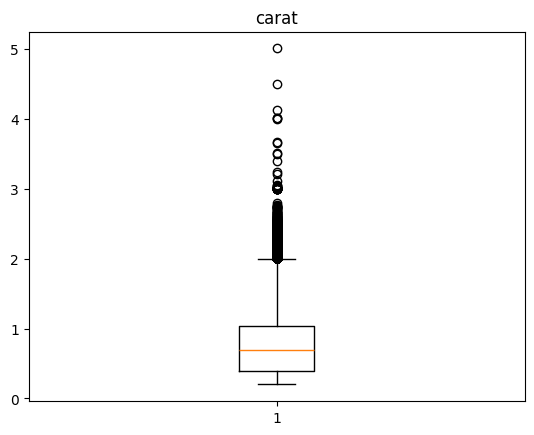

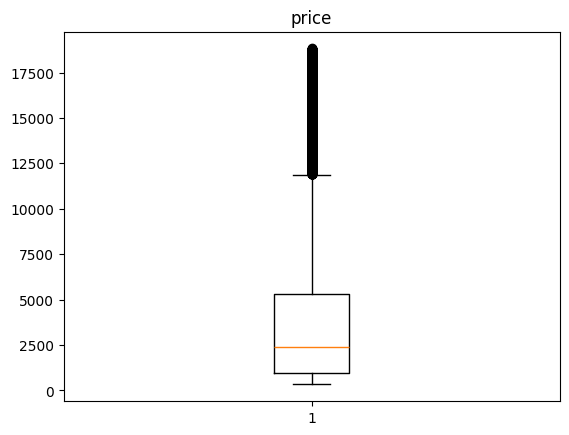

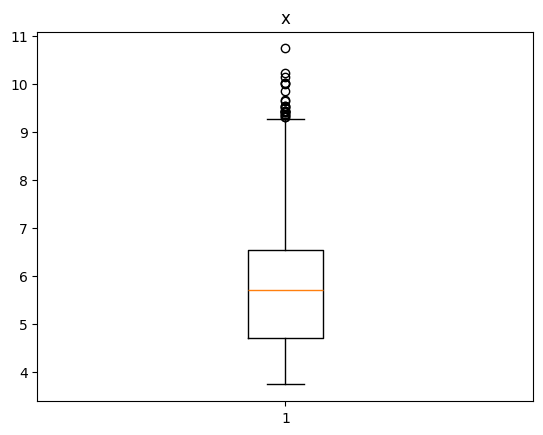

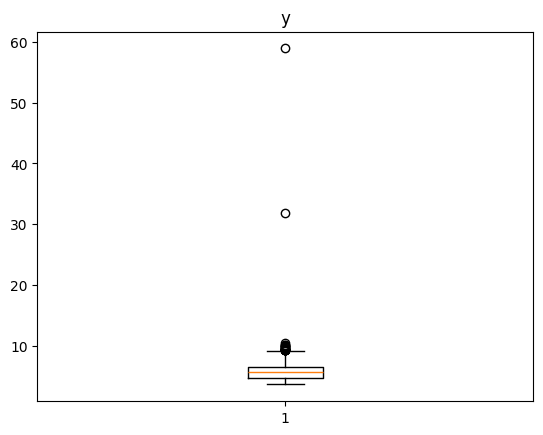

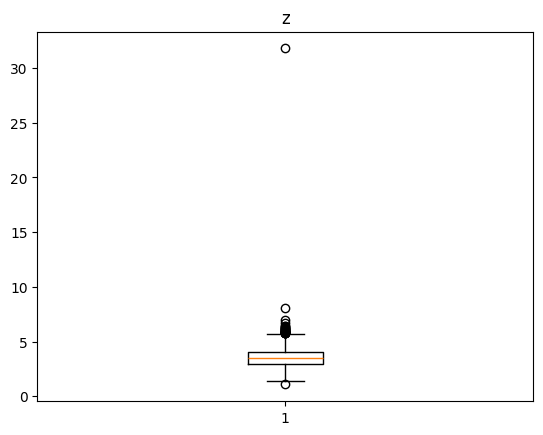

In [16]:
# print(data.columns)
for columna in limpio.columns:
    if limpio[columna].dtype in ['float64', 'int64']:
        if columna != "Unnamed: 0":
            plt.figure()
            plt.boxplot(limpio[columna])
            plt.title(columna)
            plt.show()

NO PUEDO DESCARTAR NADA, YA QUE PUEDEN SER MEDIDAS DE DIAMANTES GRANDES

---
---
---


# 6. ERRORES TIPOGRAFICOS
AUNQUE EL CODIGO SEA EL ANTERIOR LO VUELVO A PONER PARA VERIFICAR SI HAY FALLO, SE VERIFICAR QUE ES CORRECTO

In [17]:
for columna in limpio.columns:
  print(columna)
  print(limpio[columna].unique())

carat
[0.23 0.21 0.29 0.31 0.24 0.26 0.22 0.3  0.2  0.32 0.33 0.25 0.35 0.42
 0.28 0.38 0.7  0.86 0.71 0.78 0.96 0.73 0.8  0.75 0.74 0.81 0.59 0.9
 0.91 0.61 0.77 0.63 0.76 0.64 0.72 0.79 0.58 1.17 0.6  0.83 0.54 0.98
 0.52 1.01 0.53 0.84 0.51 1.05 0.55 0.87 1.   0.57 0.82 1.04 0.93 1.2
 0.99 0.34 0.43 0.36 0.95 0.89 1.02 0.97 0.56 0.85 0.92 1.27 0.66 1.12
 0.68 1.03 0.62 1.22 1.08 0.88 0.5  1.19 0.39 0.65 1.24 1.5  0.27 0.41
 1.13 1.06 0.69 0.4  1.14 0.94 1.29 1.52 1.16 1.21 1.23 1.09 0.67 1.11
 1.1  1.18 1.15 1.25 1.07 1.28 1.51 0.37 1.31 1.26 1.39 1.44 1.35 1.3
 1.32 1.41 1.36 1.45 1.34 1.58 1.54 1.38 1.33 1.74 1.64 1.47 1.4  1.55
 1.95 2.   1.37 1.83 1.62 1.57 1.69 2.06 1.72 1.66 2.14 1.49 1.46 2.15
 1.96 2.22 1.7  1.53 1.85 2.01 2.27 1.68 1.56 1.81 1.65 1.82 2.03 1.73
 1.59 1.42 1.43 2.08 1.48 1.6  2.49 1.71 2.02 2.07 3.   2.21 2.1  1.91
 2.25 2.17 2.32 2.72 1.61 2.23 2.11 2.05 1.63 2.3  2.31 1.75 2.04 2.12
 1.77 2.5  1.8  1.67 1.84 2.2  3.01 1.88 2.33 2.68 2.34 1.9  2.16 2.74
 1.

---
---
---


# 7. ESTUDIO DESCRIPTIVO


              carat         price             x             y             z
count  53920.000000  53920.000000  53920.000000  53920.000000  53920.000000
mean       0.797698   3930.993231      5.731627      5.734887      3.540046
std        0.473795   3987.280446      1.119423      1.140126      0.702530
min        0.200000    326.000000      3.730000      3.680000      1.070000
25%        0.400000    949.000000      4.710000      4.720000      2.910000
50%        0.700000   2401.000000      5.700000      5.710000      3.530000
75%        1.040000   5323.250000      6.540000      6.540000      4.040000
max        5.010000  18823.000000     10.740000     58.900000     31.800000


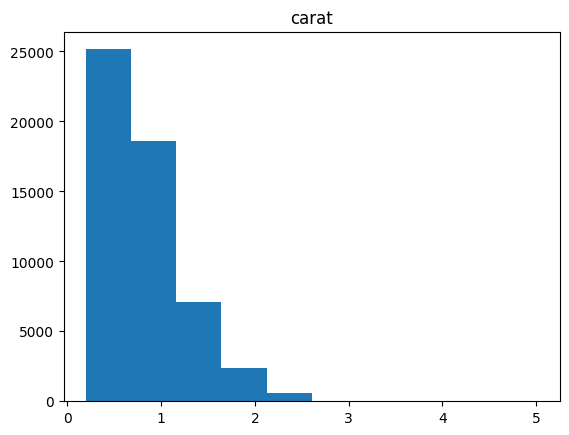

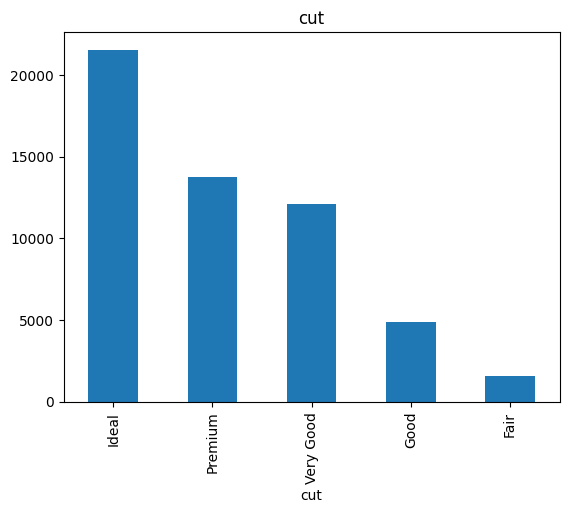

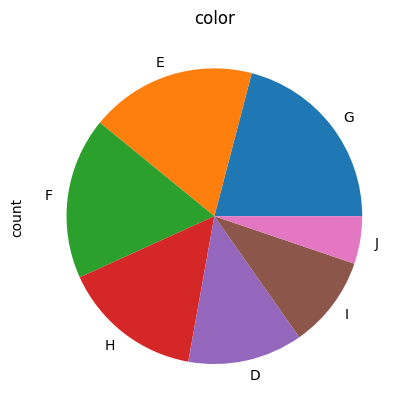

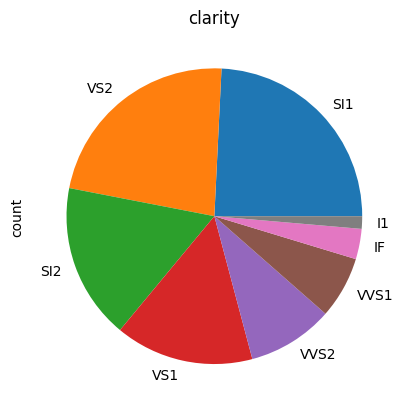

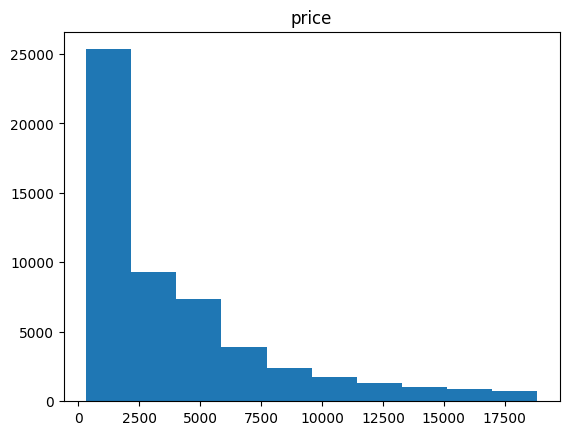

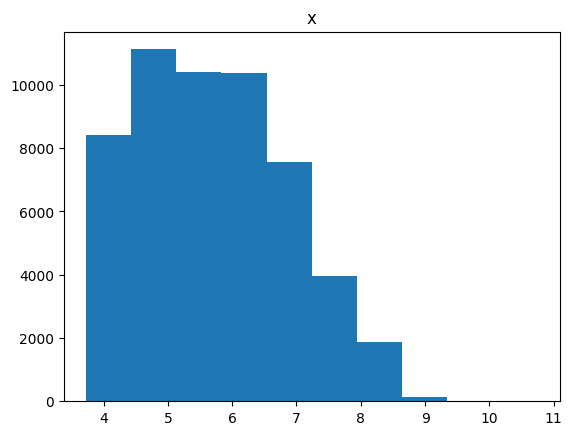

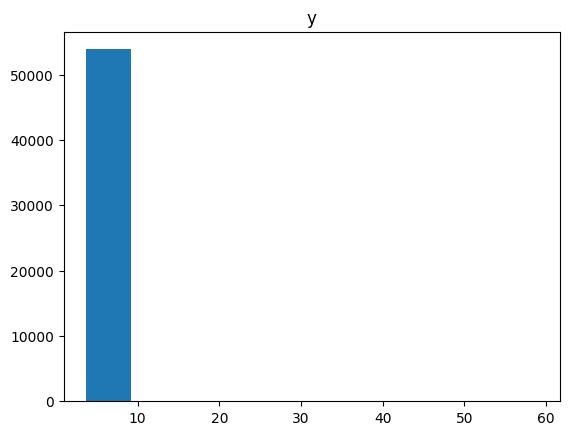

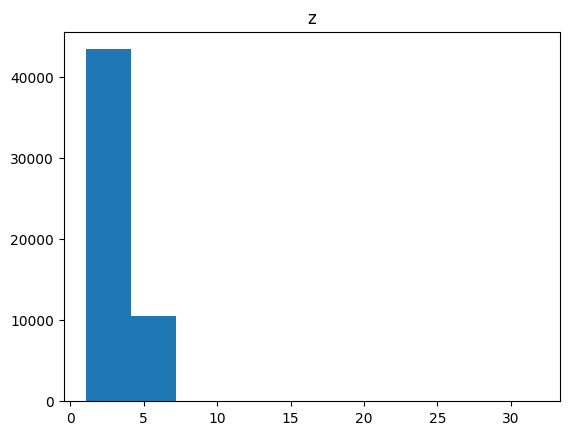

In [18]:
print(limpio.describe())
for columna in limpio.columns:
    if limpio[columna].dtype in ['float64', 'int64']:
        if columna != "Unnamed: 0":
            plt.figure()
            plt.hist(limpio[columna])
            plt.title(columna)
    if columna == "cut":
        plt.figure()
        limpio[columna].value_counts().plot(kind='bar')
        plt.title(columna)
        plt.show()
    if columna == "clarity":
        plt.figure()
        limpio[columna].value_counts().plot(kind='pie')
        plt.title(columna)
        plt.show()
    if columna == "color":
        plt.figure()
        limpio[columna].value_counts().plot(kind='pie')
        plt.title(columna)
        plt.show()

---
---
---


# 8. ESTUDIO UNIVARIADO


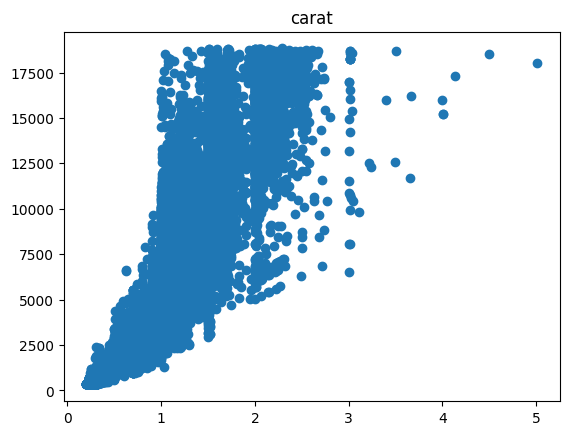

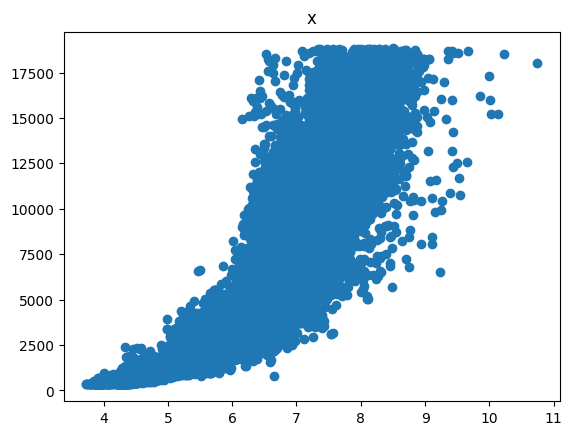

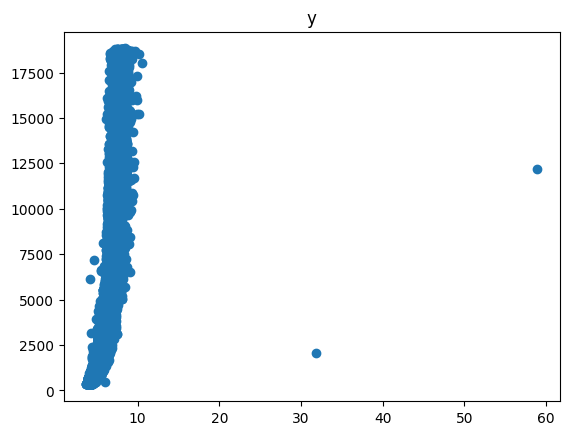

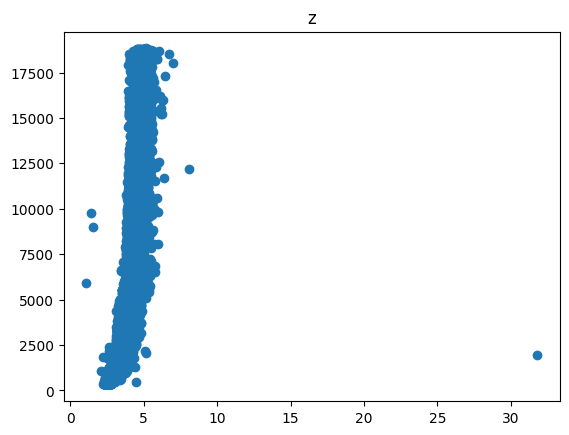

In [19]:
ejey = limpio["price"]
for x in limpio.columns:
    if limpio[x].dtype in ['float64', 'int64']:
        if (x != "Unnamed: 0") and (x != "price") :
            ejex = limpio[x]
            plt.subplot()
            plt.scatter(ejex, ejey)
            plt.title(x)
            plt.show()

---
---
---


# 9. ESTUDIO BIVARIADO


In [20]:
print(limpio.columns)

for columna in limpio.columns:

    for columna2 in limpio.columns:
        if columna != columna2:

            t = limpio["price"]
            w = limpio[columna]
            v = limpio[columna2]

            fig, ax = plt.subplots()
            ax.scatter(w, v, c=t, alpha=0.2)
            ax.set_xlabel(columna)
            ax.set_ylabel(columna2)
            ax.set_title(columna + " vs " + columna2)

            plt.show()

Output hidden; open in https://colab.research.google.com to view.

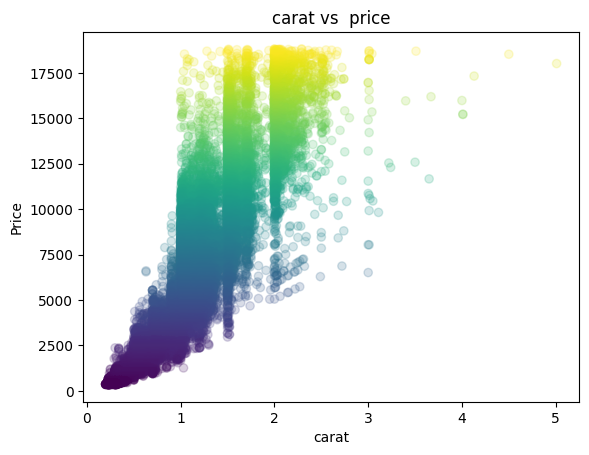

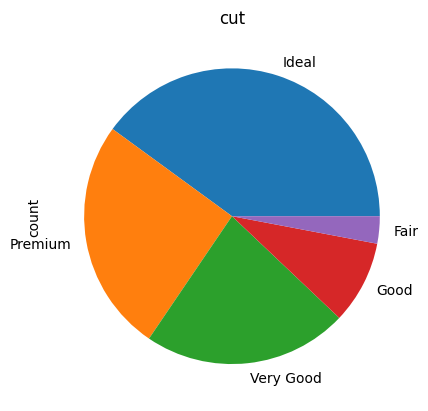

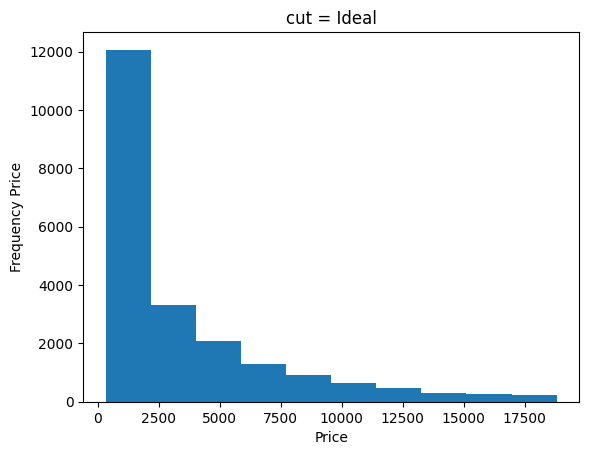

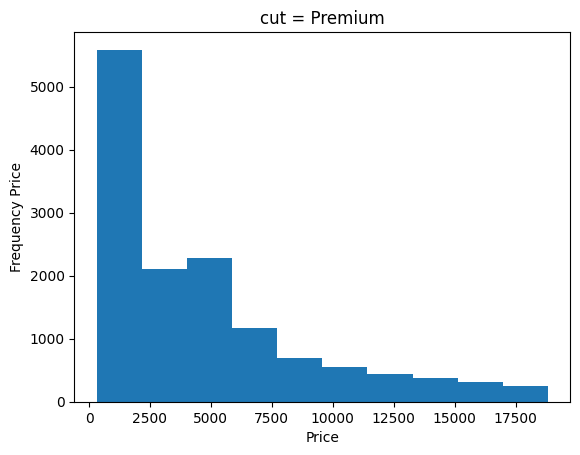

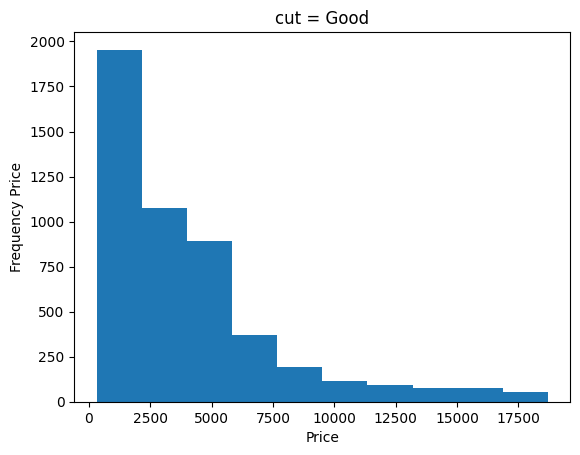

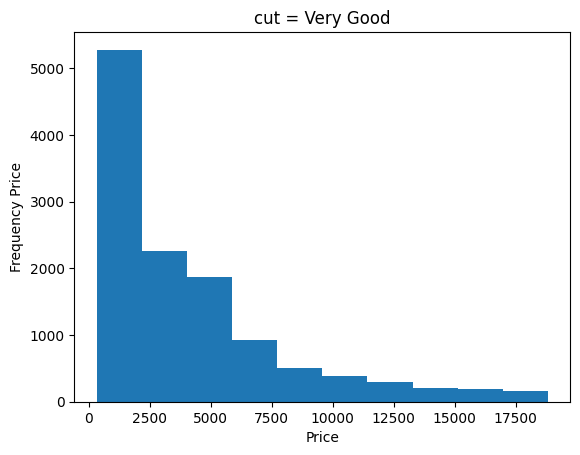

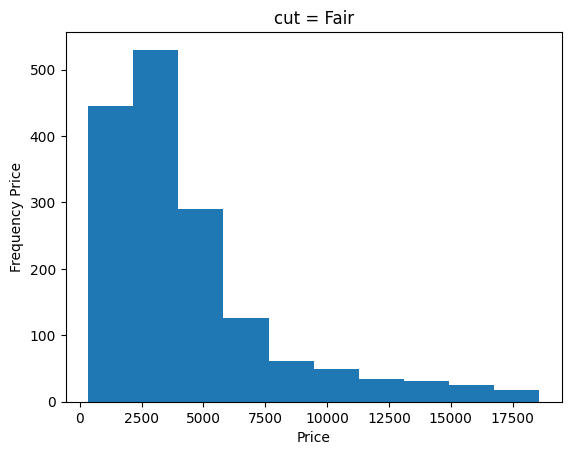

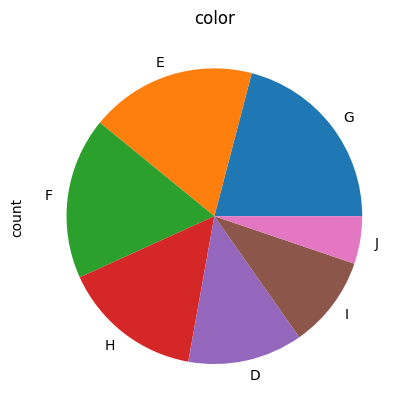

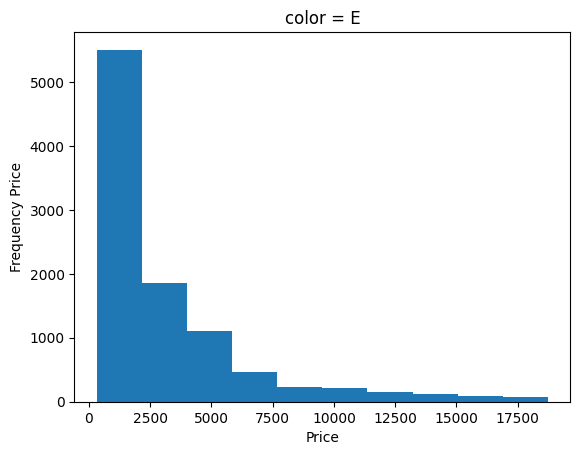

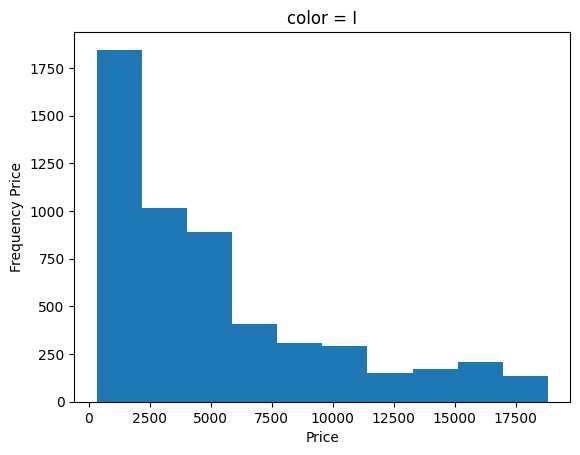

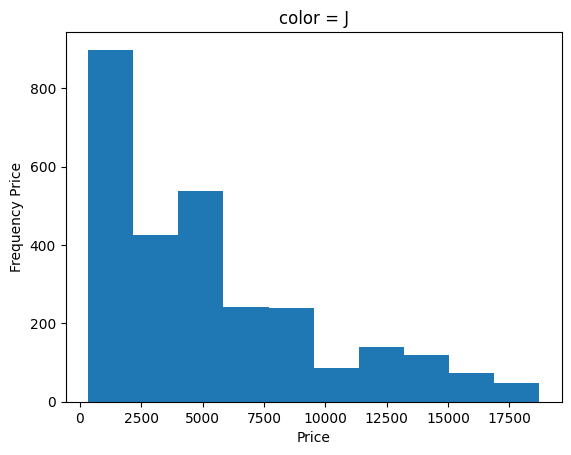

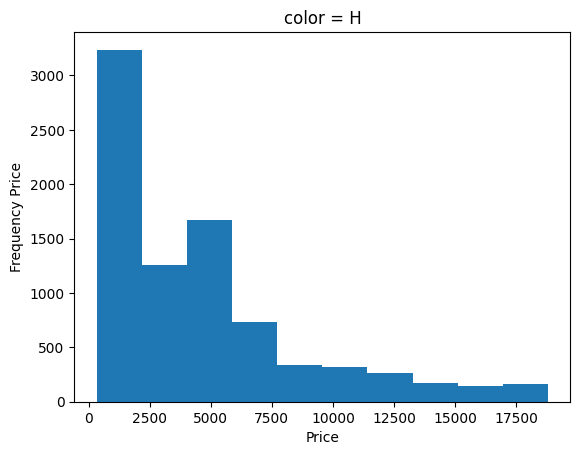

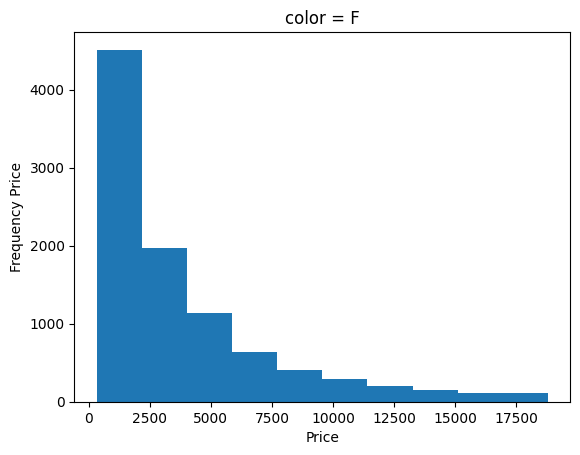

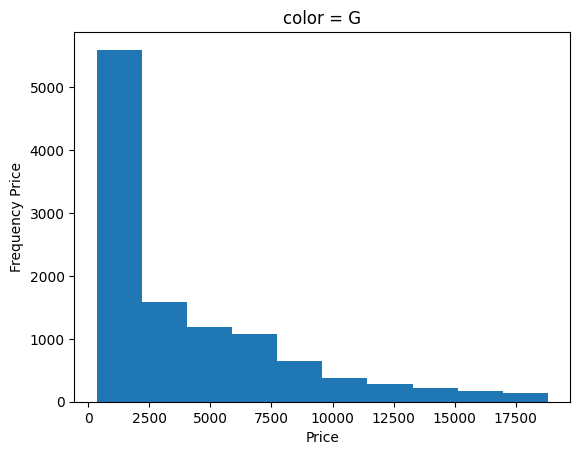

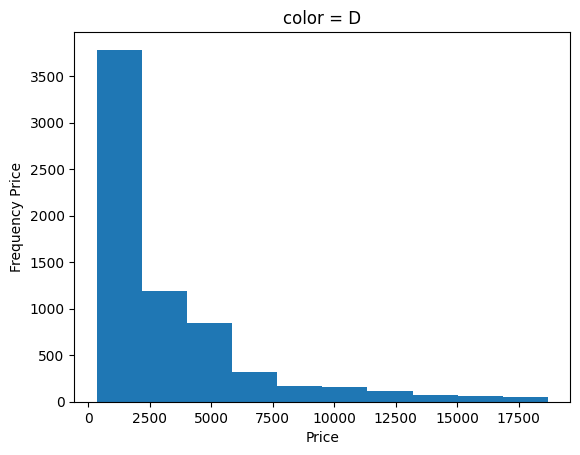

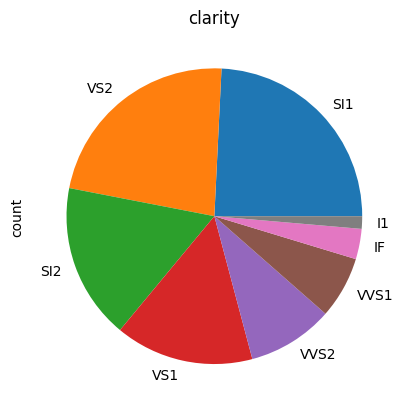

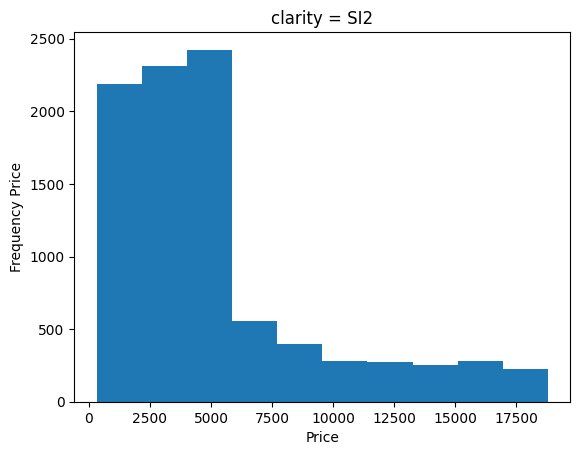

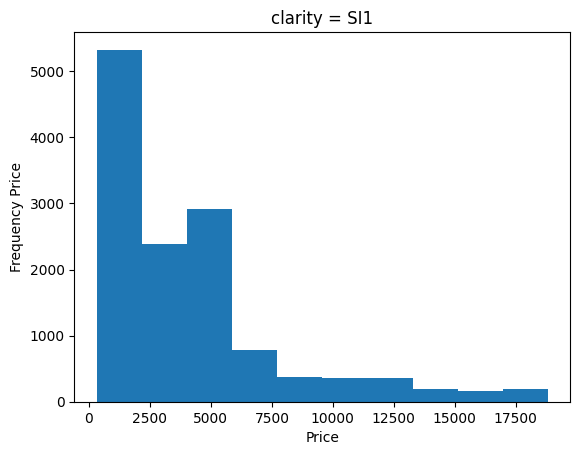

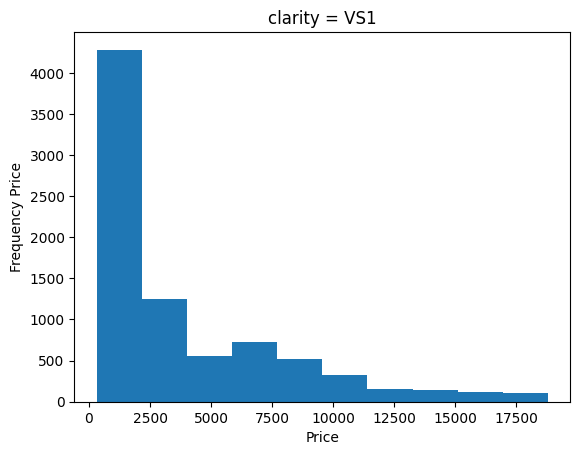

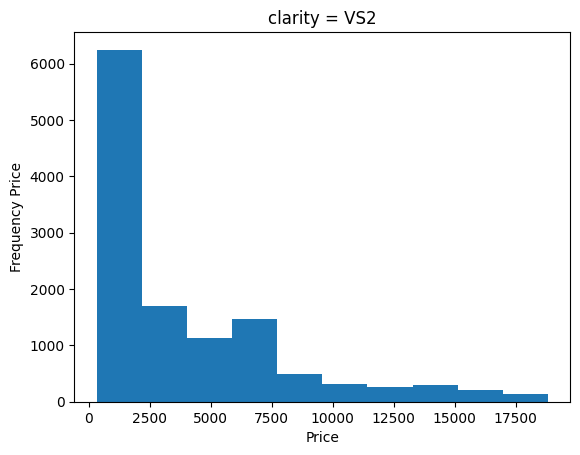

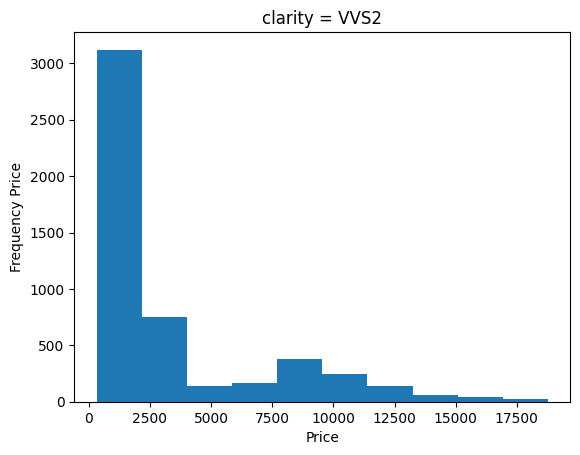

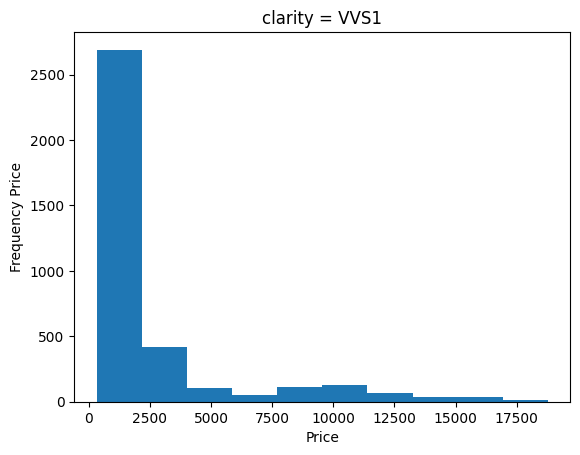

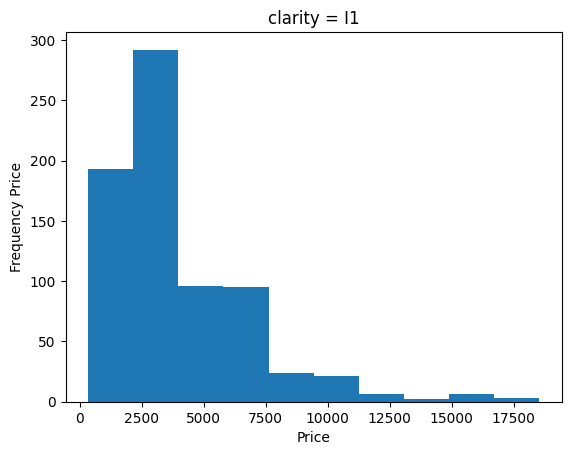

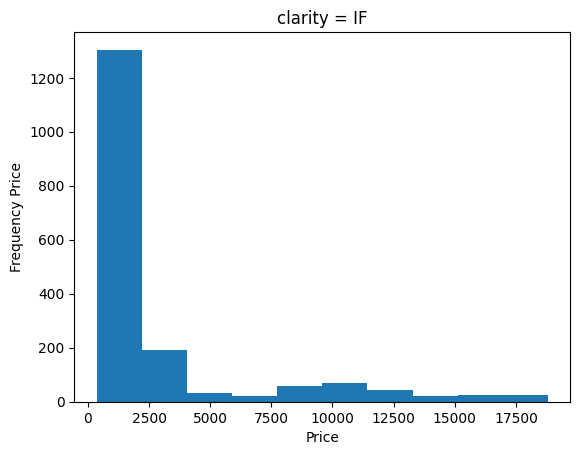

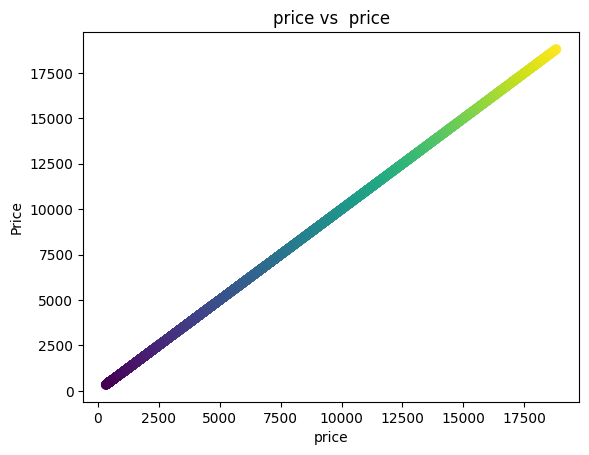

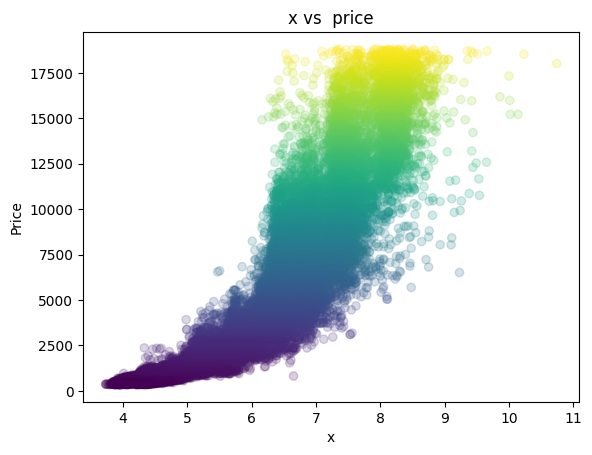

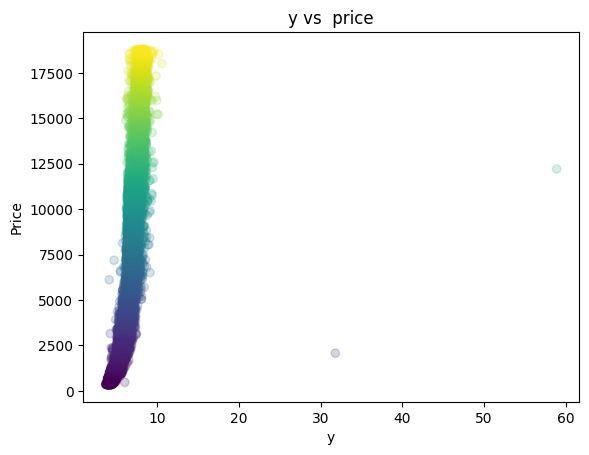

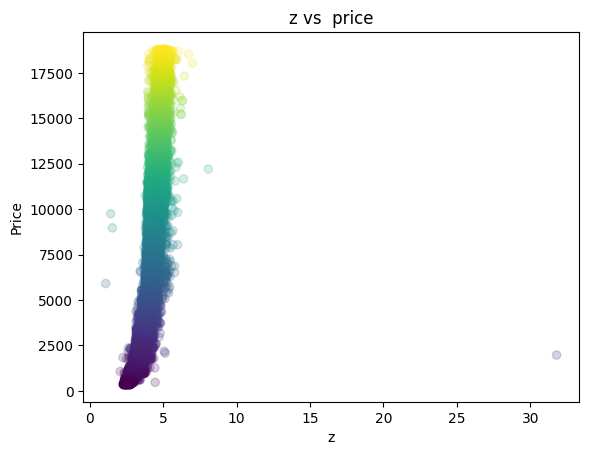

In [21]:
for columna in limpio.columns:
    t = limpio["price"]
    w = limpio["price"]
    v = limpio[columna]
    if limpio[columna].dtype in ['float64', 'int64']:
        fig, ax = plt.subplots()
        ax.scatter(v, w, c=t, alpha=0.2)
        ax.set_xlabel(columna)
        ax.set_ylabel("Price")
        ax.set_title(columna + " vs " + " price")
        plt.show()
    else:
        plt.figure()
        limpio[columna].value_counts().plot(kind='pie')
        plt.title(columna)
        plt.show()


        for parte in limpio[columna].unique():
            fig, ax = plt.subplots()
            ax.hist(limpio[limpio[columna] == parte]["price"])
            ax.set_xlabel("Price")
            ax.set_ylabel("Frequency Price")
            ax.set_title(columna + " = " + parte)







---
---
---


# 10. TRATAMIENTO DE LOS DATOS
- VEMOS OUTLIERS EN X Y Z > 10, VERIFICAMOS QUE SON VALORES EXTREMOS, POR LO QUE LOS SACAMOS DE EJECUCION
- VOLVEMOS A CREAR LA EJECUCION


       carat        cut color clarity  price      x      y      z
24067   2.00    Premium     H     SI2  12210   8.09  58.90   8.06
25998   4.01    Premium     I      I1  15223  10.14  10.10   6.17
25999   4.01    Premium     J      I1  15223  10.02   9.94   6.24
26444   4.00  Very Good     I      I1  15984  10.01   9.94   6.31
27415   5.01       Fair     J      I1  18018  10.74  10.54   6.98
27630   4.50       Fair     J      I1  18531  10.23  10.16   6.72
48410   0.51  Very Good     E     VS1   1970   5.12   5.15  31.80
49189   0.51      Ideal     E     VS1   2075   5.15  31.80   5.12
(53920, 8)
(53912, 8)


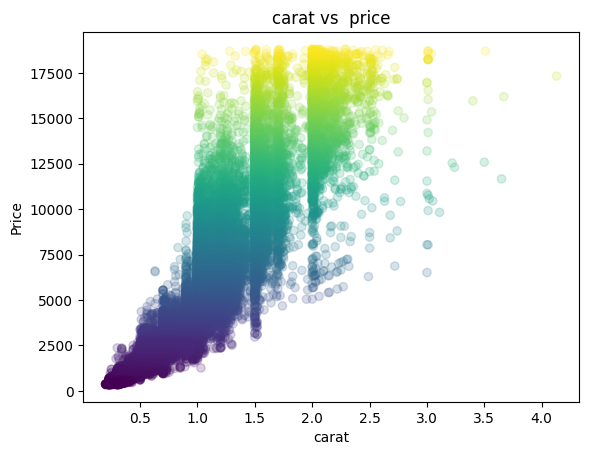

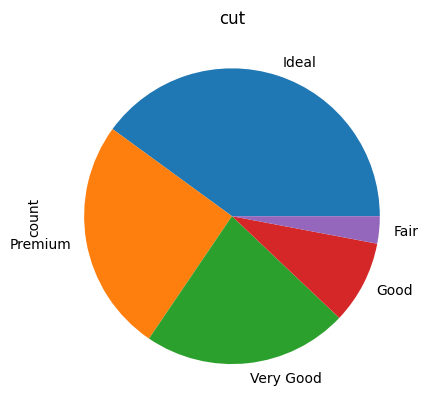

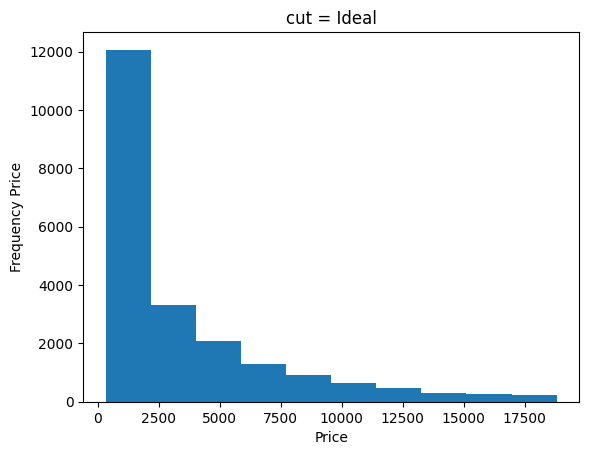

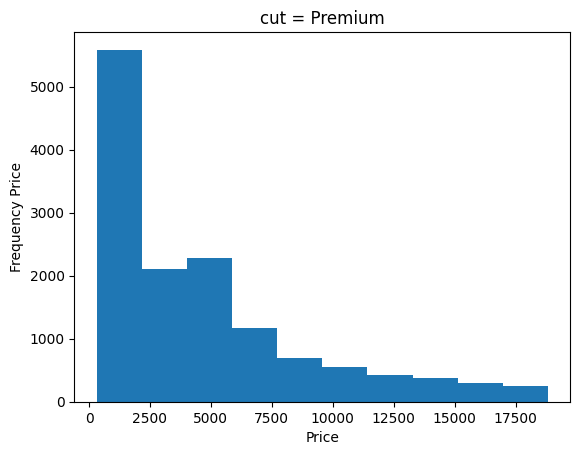

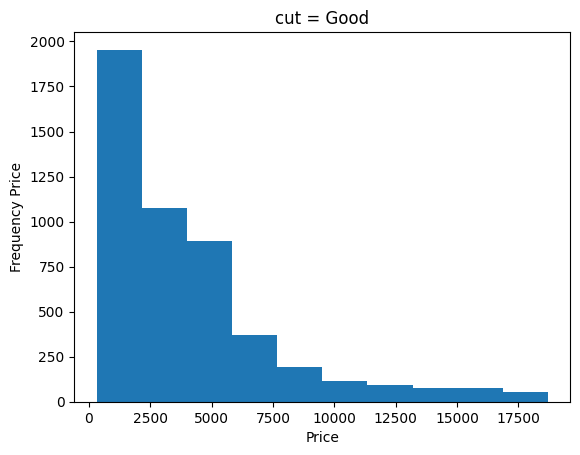

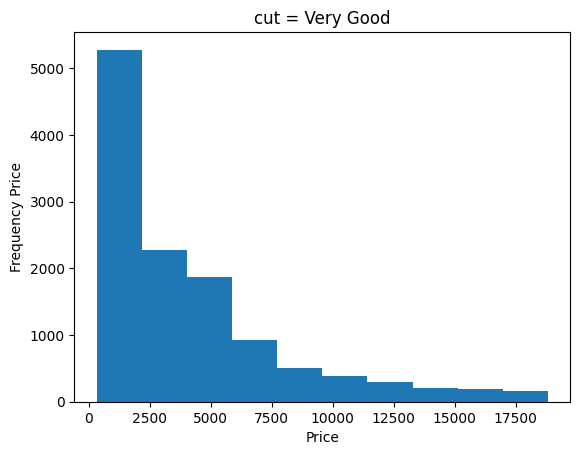

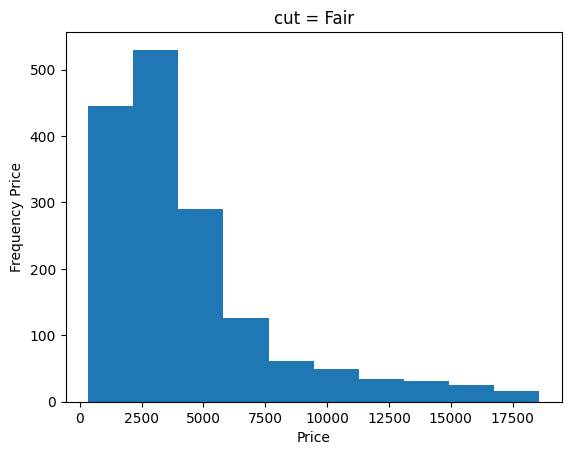

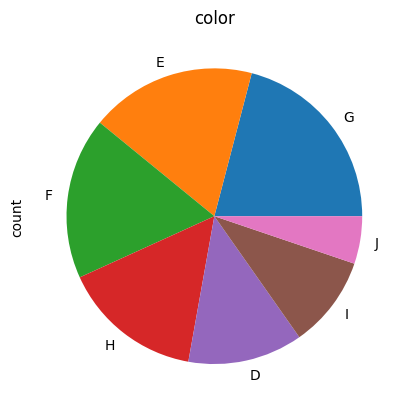

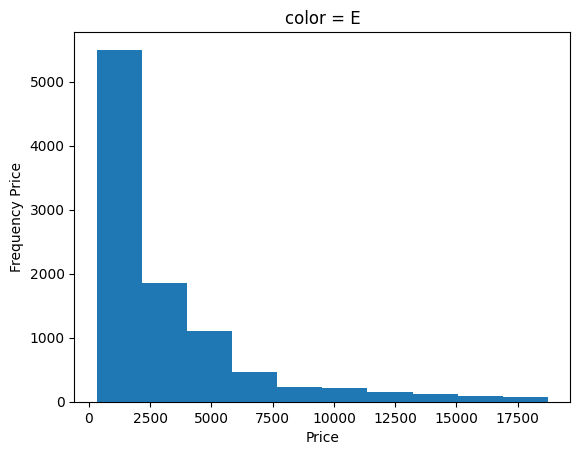

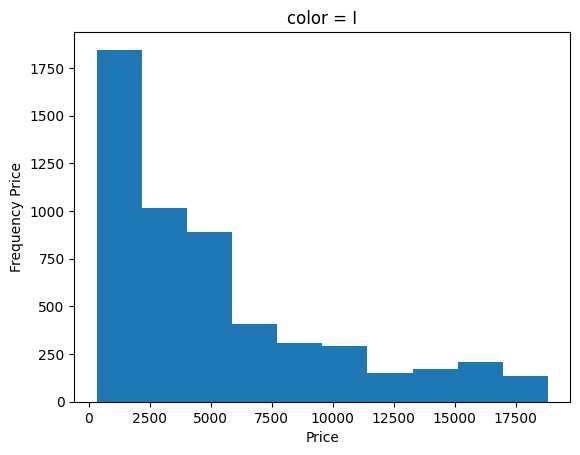

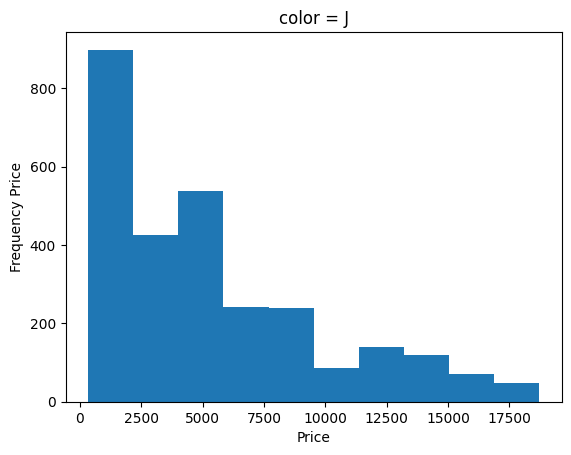

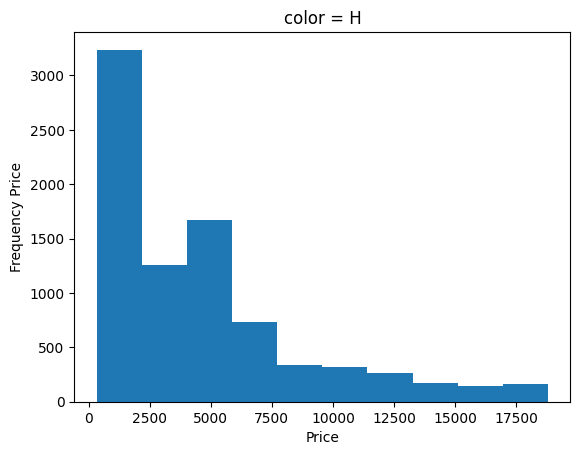

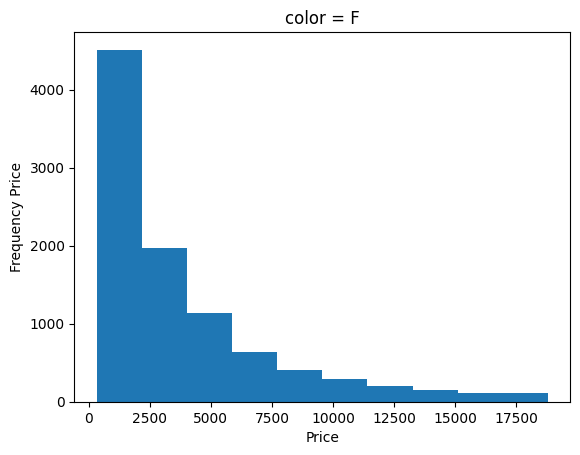

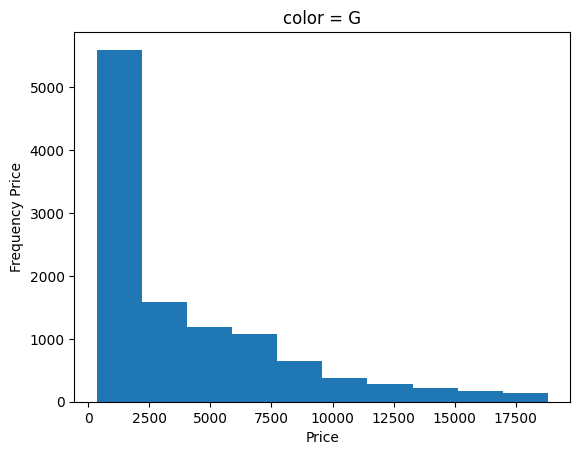

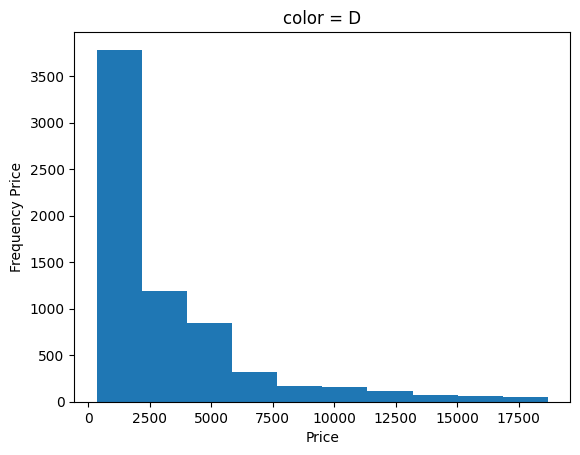

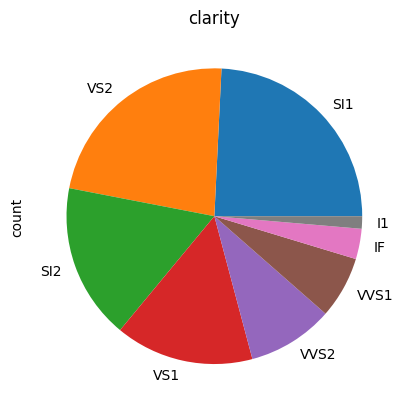

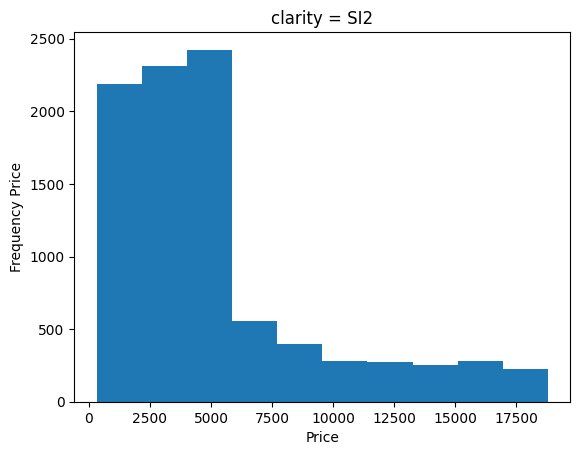

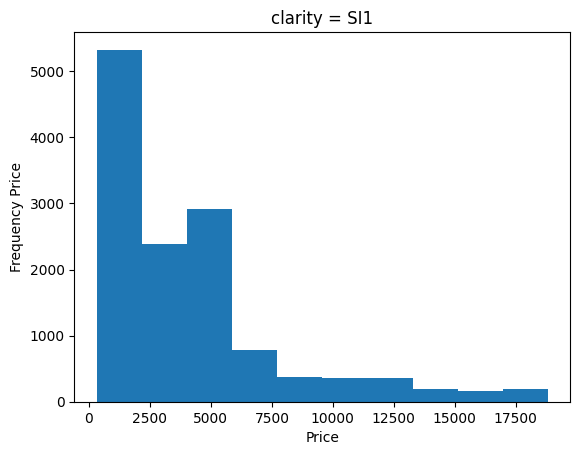

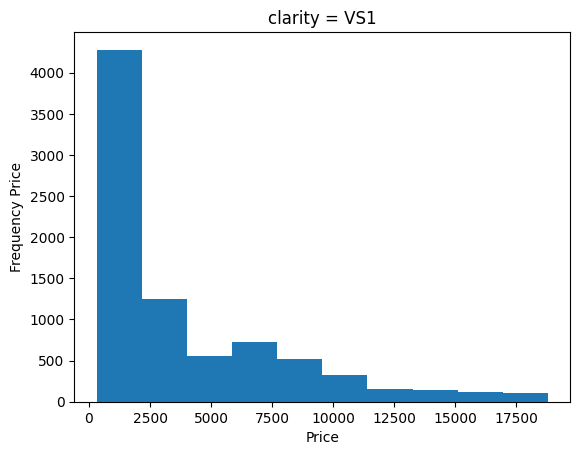

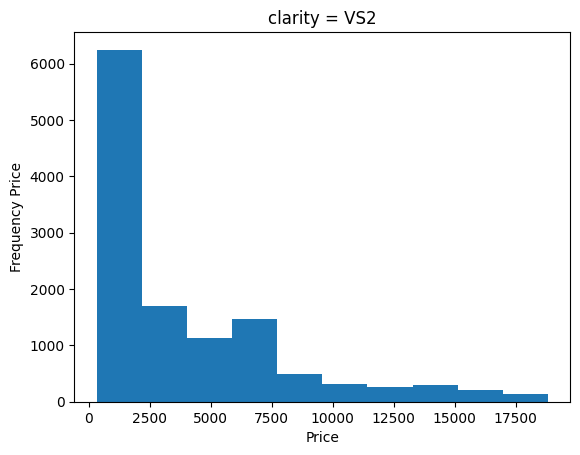

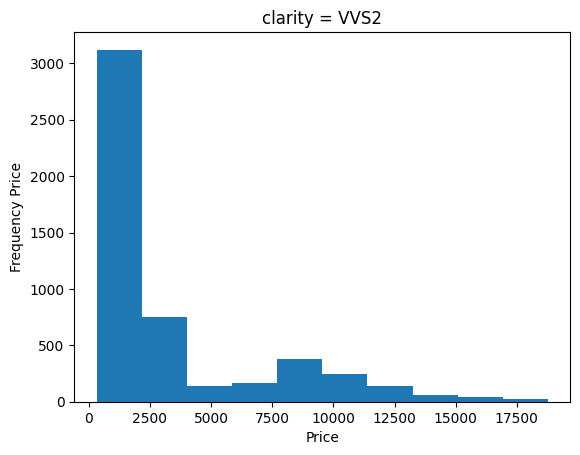

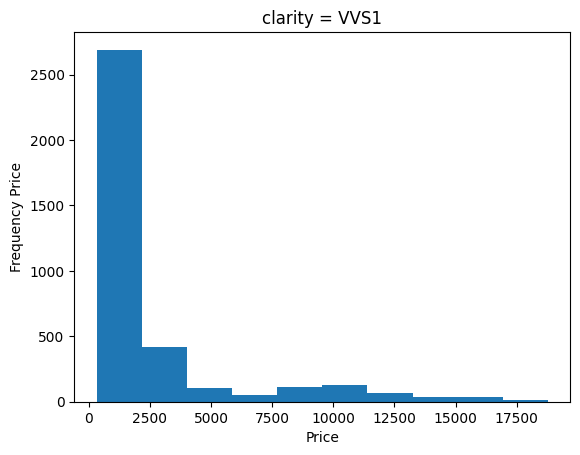

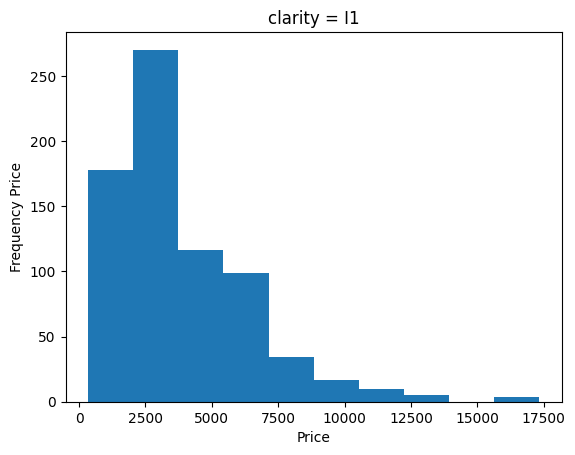

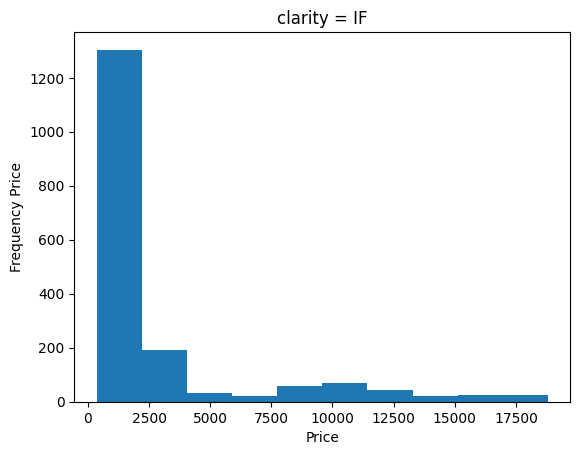

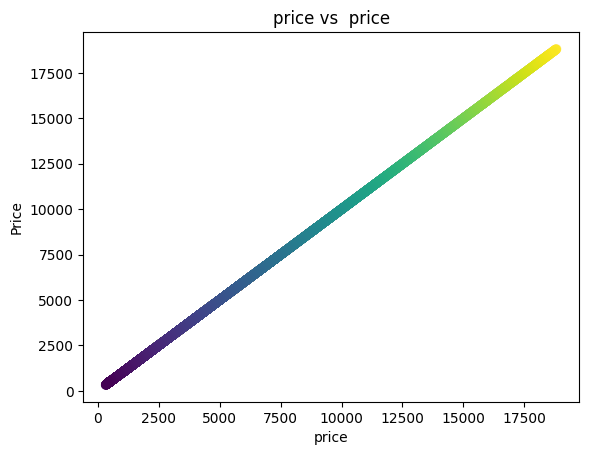

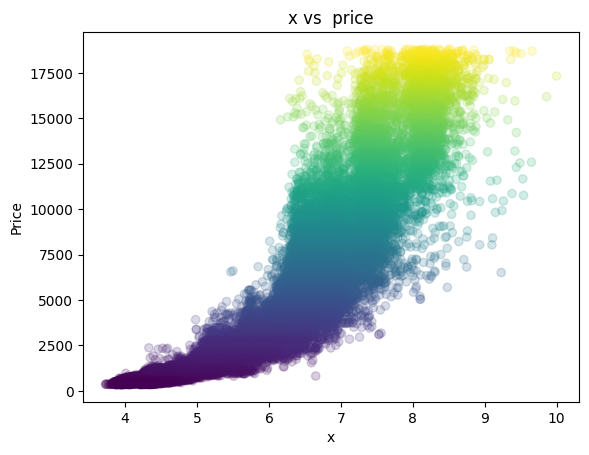

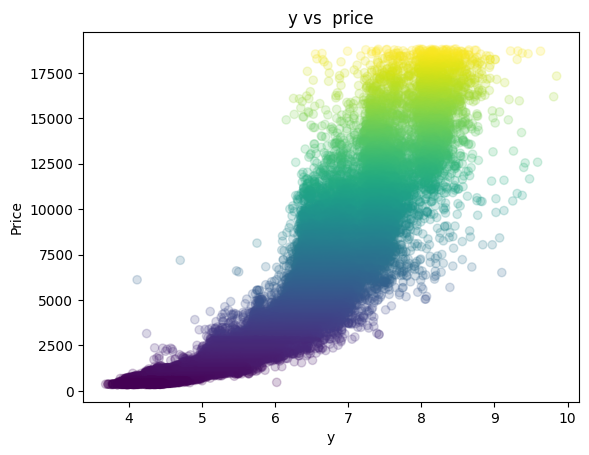

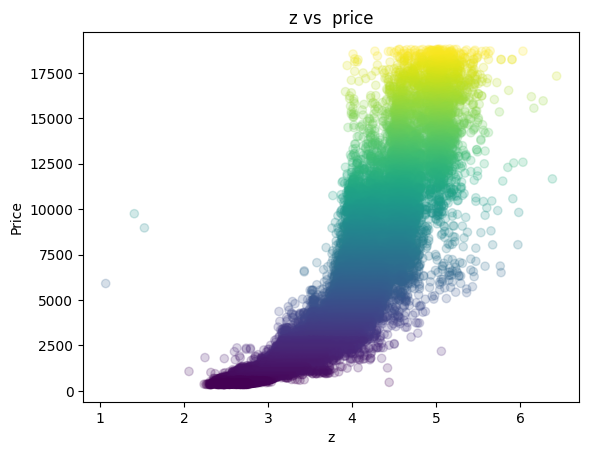

In [22]:
print(limpio[(limpio["x"]>10) | (limpio["y"]>10) | (limpio["z"]>10)])
# print(limpio[limpio["price"]>15000])
print(limpio.shape)
limpio = limpio.drop(limpio[(limpio["x"]>10) | (limpio["y"]>10) |  (limpio["z"]>10)].index)
print(limpio.shape)

for columna in limpio.columns:
    t = limpio["price"]
    w = limpio["price"]
    v = limpio[columna]
    if limpio[columna].dtype in ['float64', 'int64']:
        fig, ax = plt.subplots()
        ax.scatter(v, w, c=t, alpha=0.2)
        ax.set_xlabel(columna)
        ax.set_ylabel("Price")
        ax.set_title(columna + " vs " + " price")
        plt.show()
    else:
        plt.figure()
        limpio[columna].value_counts().plot(kind='pie')
        plt.title(columna)
        plt.show()


        for parte in limpio[columna].unique():
            fig, ax = plt.subplots()
            ax.hist(limpio[limpio[columna] == parte]["price"])
            ax.set_xlabel("Price")
            ax.set_ylabel("Frequency Price")
            ax.set_title(columna + " = " + parte)

---
---
---


# 11. PREPARACION PARA EL ENTRENAMIENTO

VAMOS A EMPLEAR
- ONE SHOT PARA CATEGORICAS
- STANDARD SCALER PARA LAS CUANTITATIVAS


In [23]:
print(limpio.shape)
Y = (limpio['price'].apply(lambda x: np.log10(x))) ## EMPLEAMOS EL LOG, REDUCIRA IMPACTO DE OUTLIERS
X = limpio.drop(columns = ['price'])
print(X.shape)
print(Y.shape)

# 1. Separar variables
X_numericas = X.select_dtypes(include=['int64', 'float64'])
X_categoricas = X.select_dtypes(include=['object', 'category'])

# 2. Escalar variables numéricas
scaler = StandardScaler()
X_numericas_scaled = scaler.fit_transform(X_numericas)
X_numericas_scaled = pd.DataFrame(X_numericas_scaled,
                                   columns=X_numericas.columns,
                                   index=X_numericas.index)

# 3. Codificar variables categóricas
encoder = OneHotEncoder(drop='first', sparse_output=False)
X_categoricas_encoded = encoder.fit_transform(X_categoricas)

# Obtener nombres de las nuevas columnas
nombres_cat = encoder.get_feature_names_out(X_categoricas.columns)
X_categoricas_encoded = pd.DataFrame(X_categoricas_encoded,
                                     columns=nombres_cat,
                                     index=X_categoricas.index)

# 4. Unir ambos DataFrames
X = pd.concat([X_numericas_scaled, X_categoricas_encoded], axis=1)

print(X.shape)
print(X.columns)
print(X)

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

limpio.columns

(53912, 8)
(53912, 7)
(53912,)
(53912, 21)
Index(['carat', 'x', 'y', 'z', 'cut_Good', 'cut_Ideal', 'cut_Premium',
       'cut_Very Good', 'color_E', 'color_F', 'color_G', 'color_H', 'color_I',
       'color_J', 'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'],
      dtype='object')
          carat         x         y         z  cut_Good  cut_Ideal  \
0     -1.200580 -1.592333 -1.578584 -1.604984       0.0        1.0   
1     -1.242902 -1.645972 -1.704653 -1.778631       0.0        0.0   
2     -1.200580 -1.502936 -1.497539 -1.778631       1.0        0.0   
3     -1.073616 -1.368840 -1.353460 -1.315572       0.0        0.0   
4     -1.031294 -1.243684 -1.245401 -1.141925       1.0        0.0   
...         ...       ...       ...       ...       ...        ...   
53935 -0.163702  0.016817  0.024295 -0.056632       0.0        1.0   
53936 -0.163702 -0.036821  0.015290  0.102544       1.0        0.0   
53937 -0.206024 -0.0636

Index(['carat', 'cut', 'color', 'clarity', 'price', 'x', 'y', 'z'], dtype='object')

---
---
---


 # 12. REGRESION LINEAL


In [21]:
regr = linear_model.LinearRegression()
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")


R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147


#### TIENE UN ERROR DE 1.146 DOLARES DE MEDIA

---
---
---


# 13. REGRESION BAYESIANA


In [22]:
regr = linear_model.BayesianRidge()
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147


#### TIENE UN ERROR DE 1.146 DOLARES DE MEDIA

---
---
---


# 14. LASSO


In [23]:
for z in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print(f"############  {z}  ##########")
    regr = linear_model.LassoLars(alpha=z)
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
    print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

    print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

############  0.1  ##########
R² (test): 0.8746
RMSE (test): 0.1559
MSE (test): 0.0243
R² (train): 0.8742
RMSE (train): 0.1563
MSE (train): 0.0244
ERROR DE TEST EN DOLARES: 1.432
############  0.2  ##########
R² (test): 0.7200
RMSE (test): 0.2330
MSE (test): 0.0543
R² (train): 0.7188
RMSE (train): 0.2337
MSE (train): 0.0546
ERROR DE TEST EN DOLARES: 1.710
############  0.3  ##########
R² (test): 0.4620
RMSE (test): 0.3229
MSE (test): 0.1043
R² (train): 0.4608
RMSE (train): 0.3236
MSE (train): 0.1047
ERROR DE TEST EN DOLARES: 2.104
############  0.4  ##########
R² (test): 0.1000
RMSE (test): 0.4177
MSE (test): 0.1745
R² (train): 0.0997
RMSE (train): 0.4181
MSE (train): 0.1748
ERROR DE TEST EN DOLARES: 2.616
############  0.5  ##########
R² (test): -0.0000
RMSE (test): 0.4403
MSE (test): 0.1939
R² (train): 0.0000
RMSE (train): 0.4407
MSE (train): 0.1942
ERROR DE TEST EN DOLARES: 2.756
############  0.6  ##########
R² (test): -0.0000
RMSE (test): 0.4403
MSE (test): 0.1939
R² (train): 0.00

#### TIENE UN ERROR DE 1.431 DOLARES DE MEDIA

---
---
---


# 15. RIDGE


In [24]:
for z in [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1]:
    print(f"############  {z}  ##########")
    regr = linear_model.Ridge(alpha=z)
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
    print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

    print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

############  0.1  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147
############  0.2  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147
############  0.3  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147
############  0.4  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147
############  0.5  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817
RMSE (train): 0.0596
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147
############  0.6  ##########
R² (test): 0.9817
RMSE (test): 0.0596
MSE (test): 0.0035
R² (train): 0.9817

#### TIENE UN ERROR DE 1.146 DOLARES DE MEDIA

---
---
---


# 16. SVR LINEAL
-POR COMPROBACION NU=0.3 C=1

In [26]:
# for z in [ 0.5]:
#    #[0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9, 1]:
#     print(f"############ nu=  {z}  ##########")
#     for w in [1]:
#      #[0.1, 0.2, 0.3,0.4, 0.5,0.6, 0.7,0.8, 0.9, 1.1, 1.2, 1.3, 1.4, 1.5]:
#         print(f"############  C = {w}  ##########")
regr = svm.NuSVR(kernel='linear', nu=0.3, C=1)
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")


R² (test): 0.9816
RMSE (test): 0.0597
MSE (test): 0.0036
R² (train): 0.9816
RMSE (train): 0.0598
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147


#### TIENE UN ERROR DE 1.147 DOLARES DE MEDIA


---
---
---


# 17. SVR POLY
POR COMPROBACION
- NU = 0.5
- C=1.1
- DEGREE = 1

In [27]:
# for z in [0.3, 0.5, 0.7]:
#     # [0.1,0.2,0.3,0.4, 0.5, 0.6,0.7,0.8, 0.9, 1]:
#     print(f"############ nu=  {z}  ##########")
#     for w in [0.9, 1, 1.1]:
#         # [0.1,0.2,0.3,0.4, 0.5, 0.6,0.7,0.8, 0.9, 1]:
#         print(f"############  C = {w}  ##########")
for v in [1]:
# [1,2,3,4,5]:
    print(f"############  degree = {v}  ##########")
    regr = svm.NuSVR(kernel='poly', nu=0.5, C=1.1, degree = v)
    regr.fit(X_train, y_train)

    y_train_pred = regr.predict(X_train)
    y_test_pred = regr.predict(X_test)

    print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
    print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
    print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
    print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
    print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

    print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

############  degree = 1  ##########
R² (test): 0.9816
RMSE (test): 0.0597
MSE (test): 0.0036
R² (train): 0.9816
RMSE (train): 0.0598
MSE (train): 0.0036
ERROR DE TEST EN DOLARES: 1.147


#### TIENE UN ERROR DE 1.147 DOLARES DE MEDIA

---
---
---


# 18. GRADIENTE


In [29]:

regr = HistGradientBoostingRegressor()
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

R² (test): 0.9910
RMSE (test): 0.0418
MSE (test): 0.0017
R² (train): 0.9916
RMSE (train): 0.0404
MSE (train): 0.0016
ERROR DE TEST EN DOLARES: 1.101


#### TIENE UN ERROR DE 1.101 DOLARES DE MEDIA

---
---
---


# 19. RANDOMFOREST


In [30]:

regr = RandomForestRegressor(max_depth=None , min_samples_split=2, random_state=0)
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")

R² (test): 0.9895
RMSE (test): 0.0451
MSE (test): 0.0020
R² (train): 0.9985
RMSE (train): 0.0172
MSE (train): 0.0003
ERROR DE TEST EN DOLARES: 1.109


#### TIENE UN ERROR DE 1.109 DOLARES DE MEDIA

---
---
---


# 20. APLICACION DEL MEJOR
EL MEJOR ES RAMDOM FOREST, VOY HA HACER UNA PEQUEÑA APLICACION DE EMPLEO DESDE EL ENTRENAMIENTO Y LA CAPTACION DE DATOS

## EJEMPLO
	carat	 cut	 color	clarity	depth	table	price	  x	     y	  z 	  log10
	0.23	Ideal	   E	   SI2	 61.5	  55	 326	 3.95	3.98 2.43	   2.513217600067939
	 0.7	 Good 	   F	   VS1	  64	  57	 2441	 5.62	 5.54	3.57	 3.387520784534471

In [56]:
## CAPTACION DE DATOS
X=dict()
# X["carat"] = input("Introduce Quilates: ")
# X["cut"] =input("Introduce Calidad Corte: ")
# X["color"] =input("Introduce Color: ")
# X["clarity"] = input("Introduce Claridad: ")
# X["x"] = input("Introduce x: ")
# X["y"] = input("Introduce y: ")
# X["z"] =input("Introduce z: ")

X["carat"] = 0.23
X["cut"] = "Ideal"
X["color"] = "E"
X["clarity"] =  "SI2"
X["x"] =  3.95
X["y"] = 3.98
X["z"] = 2.43

print(X)
print(type(X))

X = pd.DataFrame(X, index=[0])
print(X)
print(type(X))

# if ((float(X.loc[0,"x"]) > 10) or (float(X.loc[0,"y"]) > 10) or (float(X.loc[0,"z"]) > 10)):
#     print("Introduce valores menores a 10 en x y z")
#     exit()



## PREPARACION DE DATOS

# 1. Separar variables
X_numericas = X.select_dtypes(include=['int64', 'float64'])
X_categoricas = X.select_dtypes(include=['object', 'category'])

# 2. Escalar variables numéricas
X_numericas_scaled = scaler.transform(X_numericas)
X_numericas_scaled = pd.DataFrame(X_numericas_scaled,
                                   columns=X_numericas.columns,
                                   index=X_numericas.index)

# 3. Codificar variables categóricas
X_categoricas_encoded = encoder.transform(X_categoricas)

# Obtener nombres de las nuevas columnas
nombres_cat = encoder.get_feature_names_out(X_categoricas.columns)
X_categoricas_encoded = pd.DataFrame(X_categoricas_encoded,
                                     columns=nombres_cat,
                                     index=X_categoricas.index)

# 4. Unir ambos DataFrames
X = pd.concat([X_numericas_scaled, X_categoricas_encoded], axis=1)

## ENTRENAMIENTO
regr = RandomForestRegressor(max_depth=None , min_samples_split=2, random_state=0)
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")
## PRUEBA

# Predecir con el modelo (resultado en escala log10)
y_pred_log = regr.predict(X)

print("Predicciones (precio logaritmo):")
print(y_pred_log)

# Convertir de log10 a precio real
y_pred_real = 10 ** y_pred_log

print("Predicciones (precio real):")
print(y_pred_real)

print(" ####   deberia ser 326 #### ")


X = dict()

X["carat"] = 0.7
X["cut"] = "Good"
X["color"] = "F"
X["clarity"] =  "VS1"
X["x"] =  5.62
X["y"] = 5.54
X["z"] = 3.57

X = pd.DataFrame(X, index=[0])
print(X)
print(type(X))

## PREPARACION DE DATOS

# 1. Separar variables
X_numericas = X.select_dtypes(include=['int64', 'float64'])
X_categoricas = X.select_dtypes(include=['object', 'category'])

# 2. Escalar variables numéricas
X_numericas_scaled = scaler.transform(X_numericas)
X_numericas_scaled = pd.DataFrame(X_numericas_scaled,
                                   columns=X_numericas.columns,
                                   index=X_numericas.index)

# 3. Codificar variables categóricas
X_categoricas_encoded = encoder.transform(X_categoricas)

# Obtener nombres de las nuevas columnas
nombres_cat = encoder.get_feature_names_out(X_categoricas.columns)
X_categoricas_encoded = pd.DataFrame(X_categoricas_encoded,
                                     columns=nombres_cat,
                                     index=X_categoricas.index)

# 4. Unir ambos DataFrames
X = pd.concat([X_numericas_scaled, X_categoricas_encoded], axis=1)


# Predecir con el modelo (resultado en escala log10)
y_pred_log = regr.predict(X)

print("Predicciones (precio logaritmo):")
print(y_pred_log)

# Convertir de log10 a precio real
y_pred_real = 10 ** y_pred_log

print("Predicciones (precio real):")
print(y_pred_real)

print(" ####   deberia ser 2441 #### ")

{'carat': 0.23, 'cut': 'Ideal', 'color': 'E', 'clarity': 'SI2', 'x': 3.95, 'y': 3.98, 'z': 2.43}
<class 'dict'>
   carat    cut color clarity     x     y     z
0   0.23  Ideal     E     SI2  3.95  3.98  2.43
<class 'pandas.core.frame.DataFrame'>
R² (test): 0.9895
RMSE (test): 0.0451
MSE (test): 0.0020
R² (train): 0.9985
RMSE (train): 0.0172
MSE (train): 0.0003
ERROR DE TEST EN DOLARES: 1.109
Predicciones (precio logaritmo):
[2.59256764]
Predicciones (precio real):
[391.35207356]
 ####   deberia ser 326 #### 
   carat   cut color clarity     x     y     z
0    0.7  Good     F     VS1  5.62  5.54  3.57
<class 'pandas.core.frame.DataFrame'>
Predicciones (precio logaritmo):
[3.37634743]
Predicciones (precio real):
[2378.74249267]
 ####   deberia ser 2441 #### 


# RESULTADO 1

DEBERIA SER 326 OBTENEMOS 391.35 --> ERROR 65.35 --> 20.05 %

#RESULTADO 2

DEBERIA SER 2441 OBTENEMOS 2378.74 --> ERROR 62.26 --> 2.55 %


---
---
---

# A CONTINUACION UNA APLICACION PARA CUALQUIER DATO


In [24]:
## CAPTACION DE DATOS
X=dict()
X["carat"] = float(input("Introduce Quilates: "))
X["cut"] = str(input("Introduce Calidad Corte: "))
X["color"] = str(input("Introduce Color: "))
X["clarity"] = str(input("Introduce Claridad: "))
X["x"] = float(input("Introduce x: "))
X["y"] = float(input("Introduce y: "))
X["z"] = float(input("Introduce z: "))

print(X)
print(type(X))

X = pd.DataFrame(X, index=[0])
print(X)
print(type(X))

if ((float(X.loc[0,"x"]) > 10) or (float(X.loc[0,"y"]) > 10) or (float(X.loc[0,"z"]) > 10)):
    print("Introduce valores menores a 10 en x y z")
    exit()

## PREPARACION DE DATOS

# 1. Separar variables
X_numericas = X.select_dtypes(include=['int64', 'float64'])
X_categoricas = X.select_dtypes(include=['object', 'category'])

# 2. Escalar variables numéricas
X_numericas_scaled = scaler.transform(X_numericas)
X_numericas_scaled = pd.DataFrame(X_numericas_scaled,
                                   columns=X_numericas.columns,
                                   index=X_numericas.index)

# 3. Codificar variables categóricas
X_categoricas_encoded = encoder.transform(X_categoricas)

# Obtener nombres de las nuevas columnas
nombres_cat = encoder.get_feature_names_out(X_categoricas.columns)
X_categoricas_encoded = pd.DataFrame(X_categoricas_encoded,
                                     columns=nombres_cat,
                                     index=X_categoricas.index)

# 4. Unir ambos DataFrames
X = pd.concat([X_numericas_scaled, X_categoricas_encoded], axis=1)

## ENTRENAMIENTO
regr = RandomForestRegressor(max_depth=None , min_samples_split=2, random_state=0)
regr.fit(X_train, y_train)

y_train_pred = regr.predict(X_train)
y_test_pred = regr.predict(X_test)

print(f"R² (test): {r2_score(y_test, y_test_pred):.4f}")
print(f"RMSE (test): {root_mean_squared_error(y_test, y_test_pred):.4f}")
print(f"MSE (test): {mean_squared_error(y_test, y_test_pred):.4f}")
print(f"R² (train): {r2_score(y_train, y_train_pred):.4f}")
print(f"RMSE (train): {root_mean_squared_error(y_train, y_train_pred):.4f}")
print(f"MSE (train): {mean_squared_error(y_train, y_train_pred):.4f}")

print(f"ERROR DE TEST EN DOLARES: {10 ** root_mean_squared_error(y_test, y_test_pred):.3f}")
## PRUEBA

# Predecir con el modelo (resultado en escala log10)
y_pred_log = regr.predict(X)

print("Predicciones (precio logaritmo):")
print(y_pred_log)

# Convertir de log10 a precio real
y_pred_real = 10 ** y_pred_log

print("Predicciones (precio real):")
print(y_pred_real)

Introduce Quilates: 0.3
Introduce Calidad Corte: Good
Introduce Color: J
Introduce Claridad: SI1
Introduce x: 4.23
Introduce y: 4.29
Introduce z: 2.7
{'carat': 0.3, 'cut': 'Good', 'color': 'J', 'clarity': 'SI1', 'x': 4.23, 'y': 4.29, 'z': 2.7}
<class 'dict'>
   carat   cut color clarity     x     y    z
0    0.3  Good     J     SI1  4.23  4.29  2.7
<class 'pandas.core.frame.DataFrame'>
R² (test): 0.9895
RMSE (test): 0.0451
MSE (test): 0.0020
R² (train): 0.9985
RMSE (train): 0.0172
MSE (train): 0.0003
ERROR DE TEST EN DOLARES: 1.109
Predicciones (precio logaritmo):
[2.55168201]
Predicciones (precio real):
[356.19023923]
